#### Library import

In [32]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Importing Datasets

In [33]:
# Reading the data
df1 = pd.read_excel("administration_data.xlsx")
df2 = pd.read_excel("emp_data.xlsx")
df3 = pd.read_csv("Coursera_trainings.csv")
df4 = pd.read_csv("attendance_dataset_2023.csv")
df5 = pd.read_excel("departments.ods", engine="odf")

# Displaying the first few rows of each DataFrame
print("df1:")
print(df1.head())

print("\ndf2:")
print(df2.head())

print("\ndf3:")
print(df3.head())

print("\ndf4:")
print(df4.head())

print("\ndf5:")
print(df5.head())

df1:
                                   CODE       NAME_EMP GENDER  \
0  3662067b-b6fe-4aae-9cdc-3818aabe0f6b   Tony Freeman      F   
1  9dc32ab1-c05c-4016-9b76-df80a0407b01   Donna Larson      F   
2  30c476ef-6058-4f8c-985b-56ae3eeb135d  Lauren Santos      M   
3  339aaafb-a155-4058-81f4-78647f1c78e1  David Kennedy      M   
4  9d04f05c-5f3a-40fc-85e8-834ee5a7c9e6   Casey Turner      M   

                                             ADDRESS  MARITAL_STATUS  \
0           1087 Blake Spring\nLindsayland, GU 63148               0   
1    86475 White Ports Suite 192\nMooreton, WV 86516               0   
2  9702 Wilson Falls Suite 470\nDennisfort, VT 52820               1   
3                   Unit 6731 Box 3814\nDPO AA 82476               0   
4  56039 Steven Springs Apt. 717\nMarkmouth, ID 9...               0   

          Grade TYPE_DIPLOMA  EXP_YEARS                      EMAIL  \
0            RH       Master         17   tony_freeman@example.com   
1            RH      Licence   

### Missing values visualization

C:\Users\lando\AppData\Local\Temp\ipykernel_207668\2991074941.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')


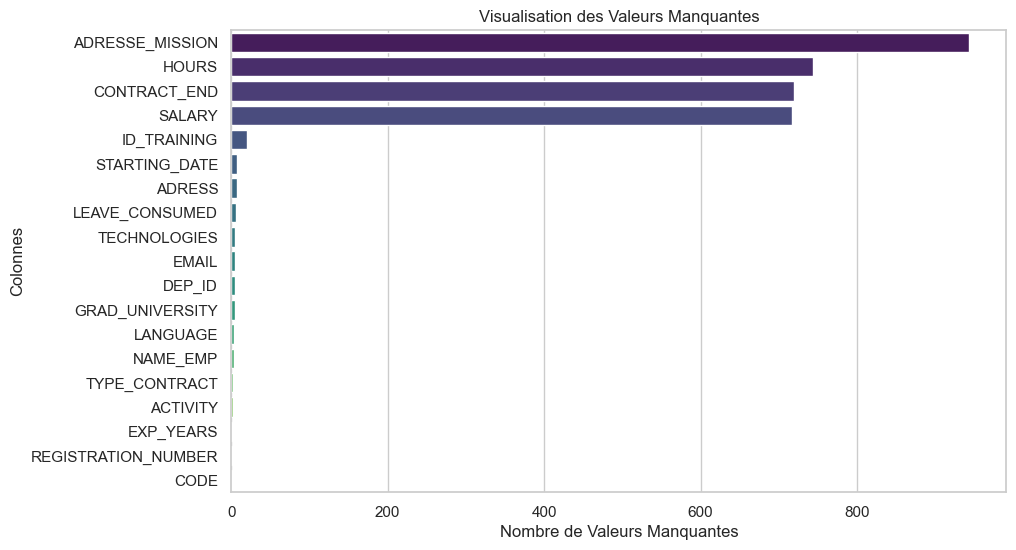

In [34]:
missing_values = df2.isnull().sum()

# Trier les colonnes par nombre de valeurs manquantes
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Créer un diagramme à barres pour visualiser les valeurs manquantes
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')
plt.title('Visualisation des Valeurs Manquantes')
plt.xlabel('Nombre de Valeurs Manquantes')
plt.ylabel('Colonnes')
plt.show()

C:\Users\lando\AppData\Local\Temp\ipykernel_207668\1160143415.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')


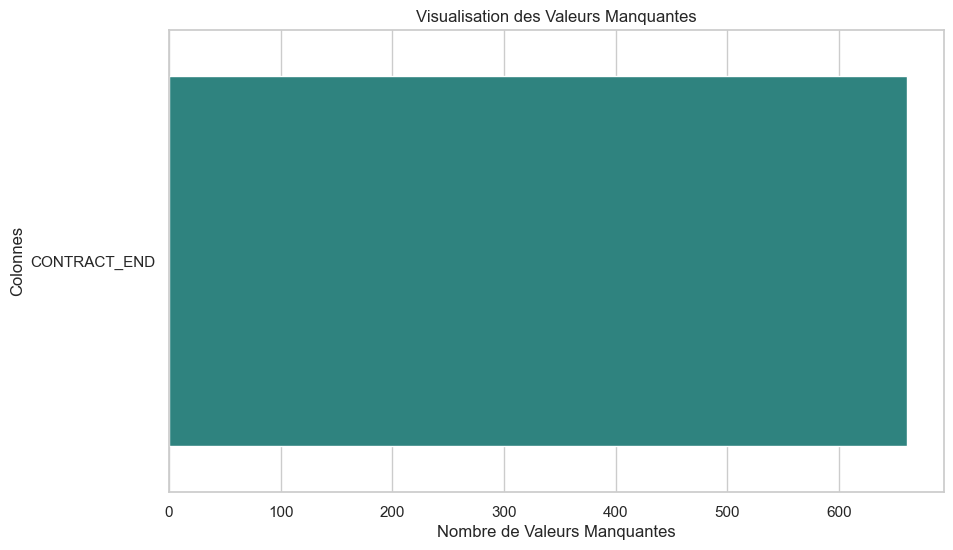

In [35]:
missing_values = df1.isnull().sum()

# Trier les colonnes par nombre de valeurs manquantes
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Créer un diagramme à barres pour visualiser les valeurs manquantes
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')
plt.title('Visualisation des Valeurs Manquantes')
plt.xlabel('Nombre de Valeurs Manquantes')
plt.ylabel('Colonnes')
plt.show()

In [36]:
#transform to DateTime
#administration_data
df1["STARTING_DATE"]=pd.to_datetime(df1["STARTING_DATE"])
df1["CONTRACT_START"]=pd.to_datetime(df1["CONTRACT_START"])
df1["CONTRACT_END"]=pd.to_datetime(df1["CONTRACT_END"])
#attendance_dataset_2023
df4["Date"]=pd.to_datetime(df4["Date"])

### Number of employees

1) number of employees in administration department:

In [37]:
# Number of employees in administration_data
num_employees_administration = len(df1)
print("Number of employees in administration_data:", num_employees_administration)

Number of employees in administration_data: 1279


2) number of employees per department:

In [38]:
# Number of employees in emp_data
num_employees = len(df2)
print("Number of employees in emp_data table:", num_employees)

Number of employees in emp_data table: 1461


C:\Users\lando\AppData\Local\Temp\ipykernel_207668\956005612.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='DEP', data=df_merged, palette='viridis')


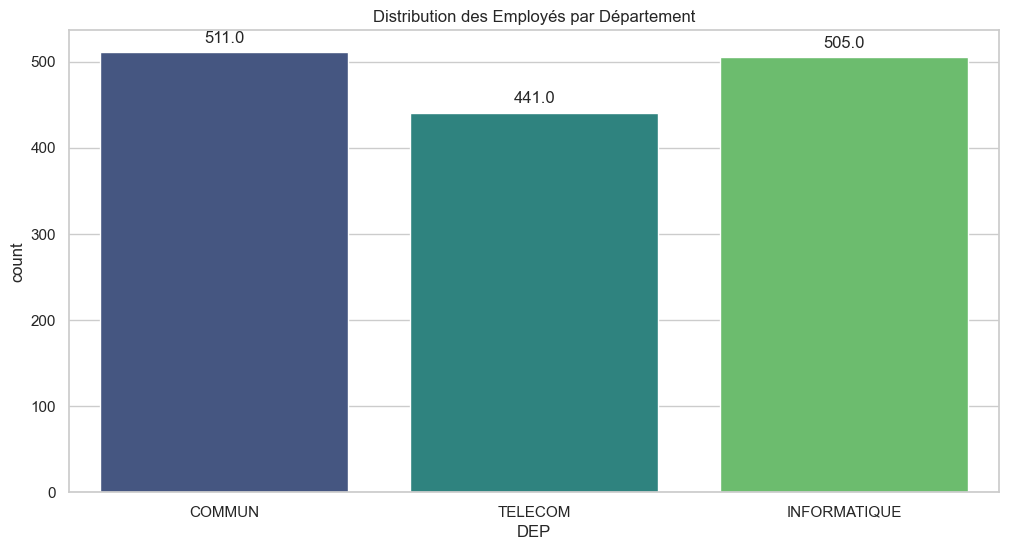

In [39]:
df_merged = pd.merge(df2, df5, left_on='DEP_ID', right_on='ID_DEP', how='left')

# Visualisation de la distribution des employés par département
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='DEP', data=df_merged, palette='viridis')

# Ajout d'annotations pour afficher le nombre exact d'employés au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution des Employés par Département')
plt.show()

### Gender and marital status Distribution:

1) Administration department:

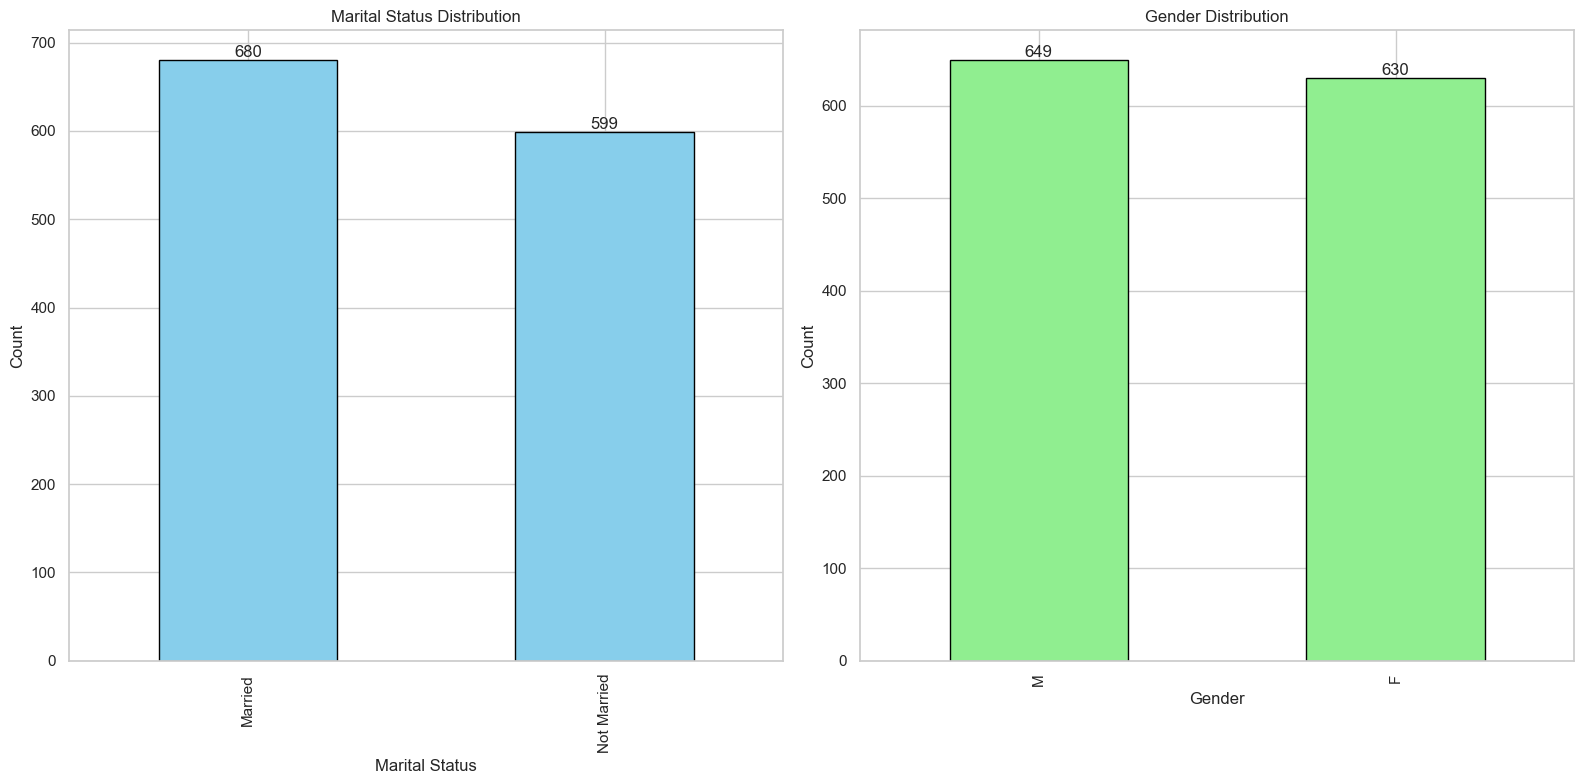

In [61]:
# Replace 1 with 'Married' and 0 with 'Not Married' in MARITAL_STATUS column
df1['MARITAL_STATUS'] = df1['MARITAL_STATUS'].replace({1: 'Married', 0: 'Not Married'})

# Count the number of employees by social status
social_status_counts = df1['MARITAL_STATUS'].value_counts()

# Replace 1 with 'Male' and 0 with 'Female' in GENDER column
df1['GENDER'] = df1['GENDER'].replace({1: 'Male', 0: 'Female'})

# Count the number of employees by gender
gender_counts = df1['GENDER'].value_counts()

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for Marital Status
social_status_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Marital Status Distribution')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Count')

# Display values on top of each bar
for i in range(len(social_status_counts)):
    axes[0].text(i, social_status_counts[i], social_status_counts[i], ha='center', va='bottom')

# Plot for Gender
gender_counts.plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Display values on top of each bar
for i in range(len(gender_counts)):
    axes[1].text(i, gender_counts[i], gender_counts[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()


2) Others departments:

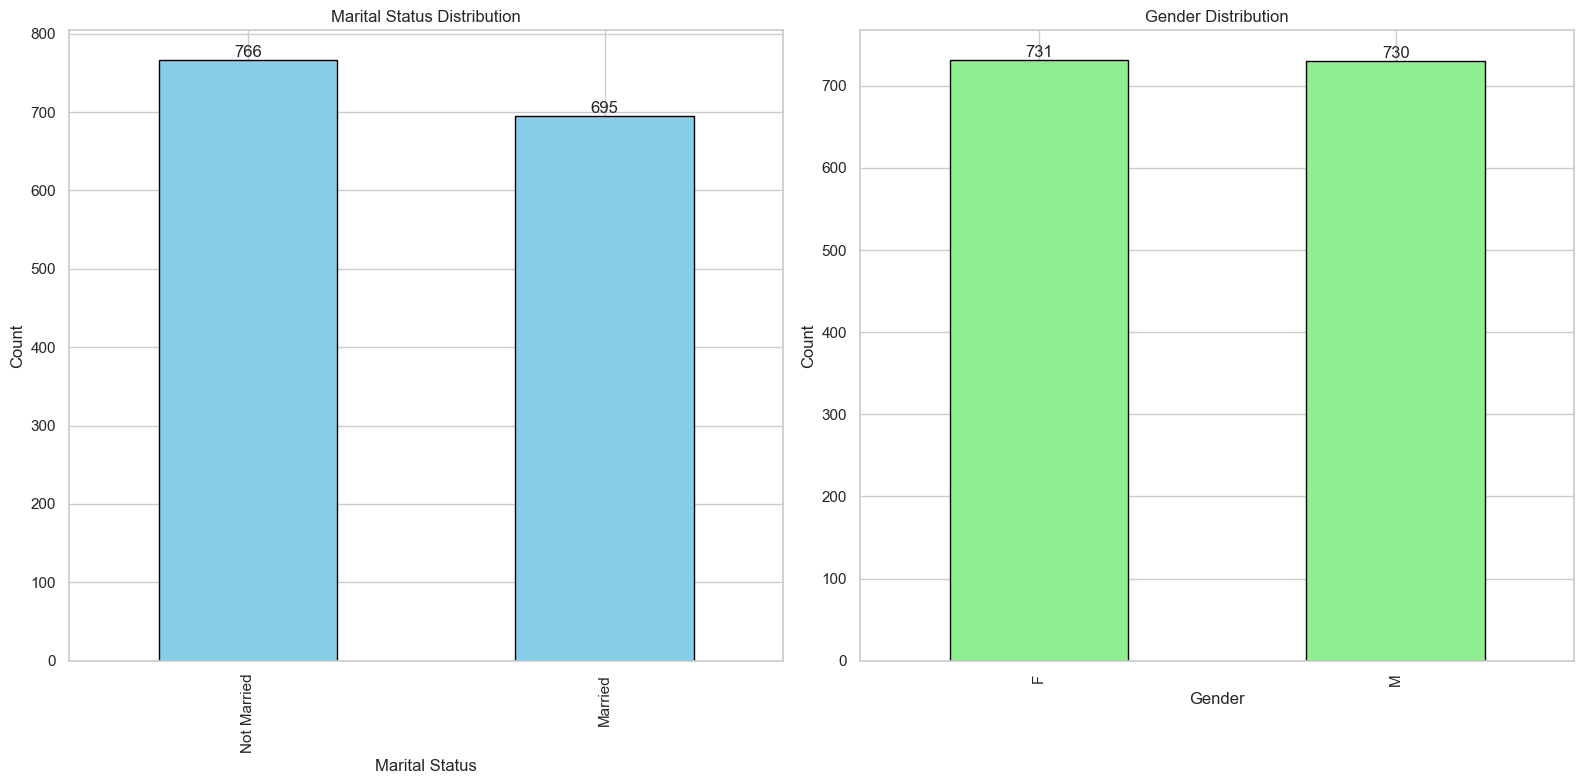

In [41]:
# Replace 1 with 'Married' and 0 with 'Not Married' in MARITAL_STATUS column
df2['MARITAL_STATUS'] = df2['MARITAL_STATUS'].replace({1: 'Married', 0: 'Not Married'})

# Count the number of employees by social status
social_status_counts = df2['MARITAL_STATUS'].value_counts()

# Replace 1 with 'Male' and 0 with 'Female' in GENDER column
df2['GENDER'] = df2['GENDER'].replace({1: 'Male', 0: 'Female'})

# Count the number of employees by gender
gender_counts = df2['GENDER'].value_counts()

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for Marital Status
social_status_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Marital Status Distribution')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Count')

# Display values on top of each bar
for i in range(len(social_status_counts)):
    axes[0].text(i, social_status_counts[i], social_status_counts[i], ha='center', va='bottom')

# Plot for Gender
gender_counts.plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Display values on top of each bar
for i in range(len(gender_counts)):
    axes[1].text(i, gender_counts[i], gender_counts[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Employee Distribution according to their contract Status:

1) Administration department:

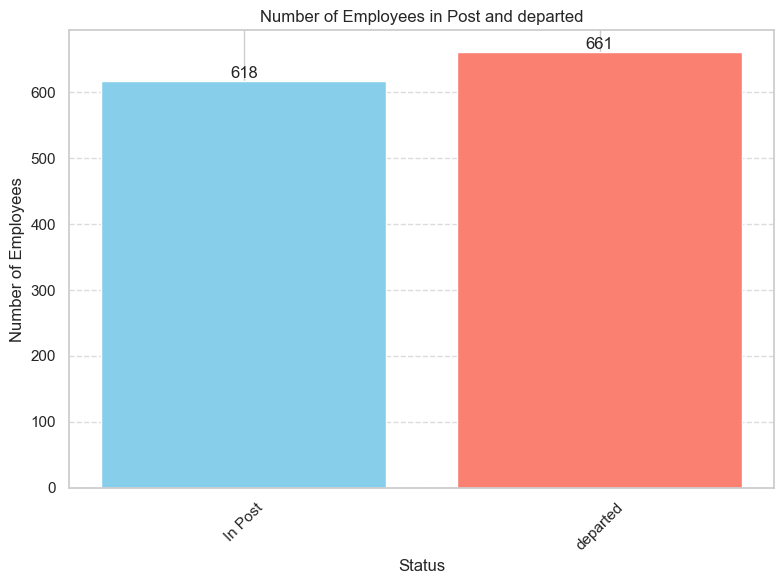

In [42]:
# Calculate the number of ongoing contracts (in post) in administration_data
num_ongoing_contracts = df1['CONTRACT_END'].notnull().sum()

# Calculate the number of departed employees (parti) in emp_data
num_departed_employees = df1['CONTRACT_END'].isnull().sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['In Post', 'departed'], [num_ongoing_contracts, num_departed_employees], color=['skyblue', 'salmon'])

# Add text annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

plt.title('Number of Employees in Post and departed')
plt.xlabel('Status')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2) Others departments:

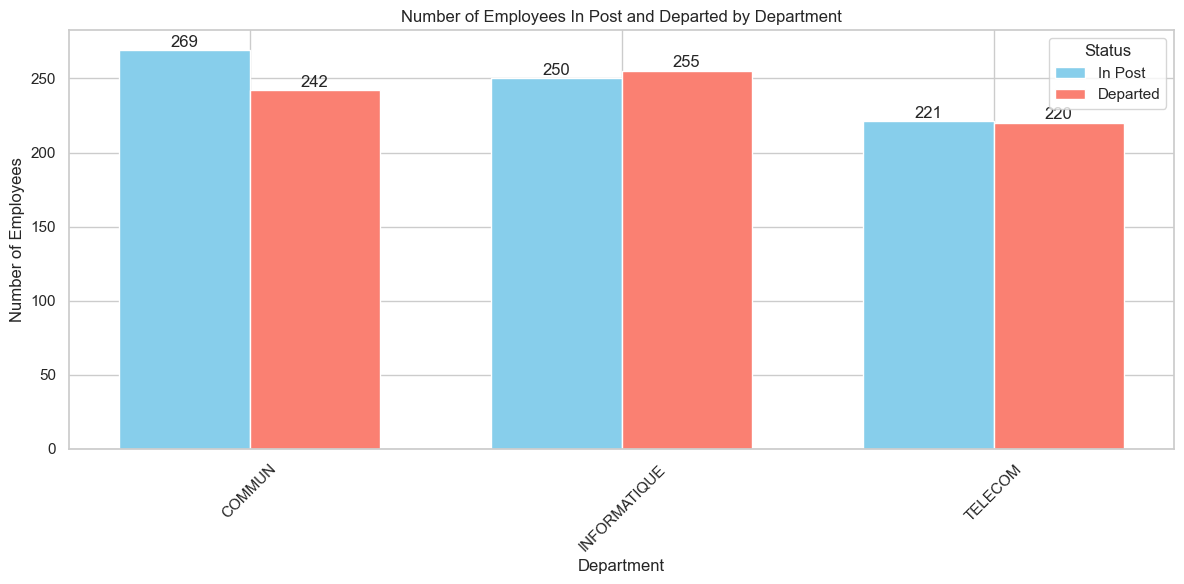

In [43]:
# Merge df2 with department data
df_merged_emp = pd.merge(df2, df5, left_on='DEP_ID', right_on='ID_DEP', how='left')

# Filter data to include only employees in post and departed
df_in_post = df_merged_emp[df_merged_emp['CONTRACT_END'].notnull()]
df_departed = df_merged_emp[df_merged_emp['CONTRACT_END'].isnull()]

# Group by department and count the number of employees in post and departed
in_post_counts = df_in_post.groupby('DEP').size().reset_index(name='In Post')
departed_counts = df_departed.groupby('DEP').size().reset_index(name='Departed')

# Merge the counts
df_counts = pd.merge(in_post_counts, departed_counts, on='DEP', how='outer').fillna(0)

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
departments = np.arange(len(df_counts))

plt.bar(departments, df_counts['In Post'], width=bar_width, color='skyblue', label='In Post')
plt.bar(departments + bar_width, df_counts['Departed'], width=bar_width, color='salmon', label='Departed')

# Add exact numbers above each bar
for i, (in_post, departed) in enumerate(zip(df_counts['In Post'], df_counts['Departed'])):
    plt.text(i, in_post + 0.5, str(in_post), ha='center', va='bottom')
    plt.text(i + bar_width, departed + 0.5, str(departed), ha='center', va='bottom')

plt.title('Number of Employees In Post and Departed by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(departments + bar_width / 2, df_counts['DEP'])
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Contracts visualization:

1) Administration department:

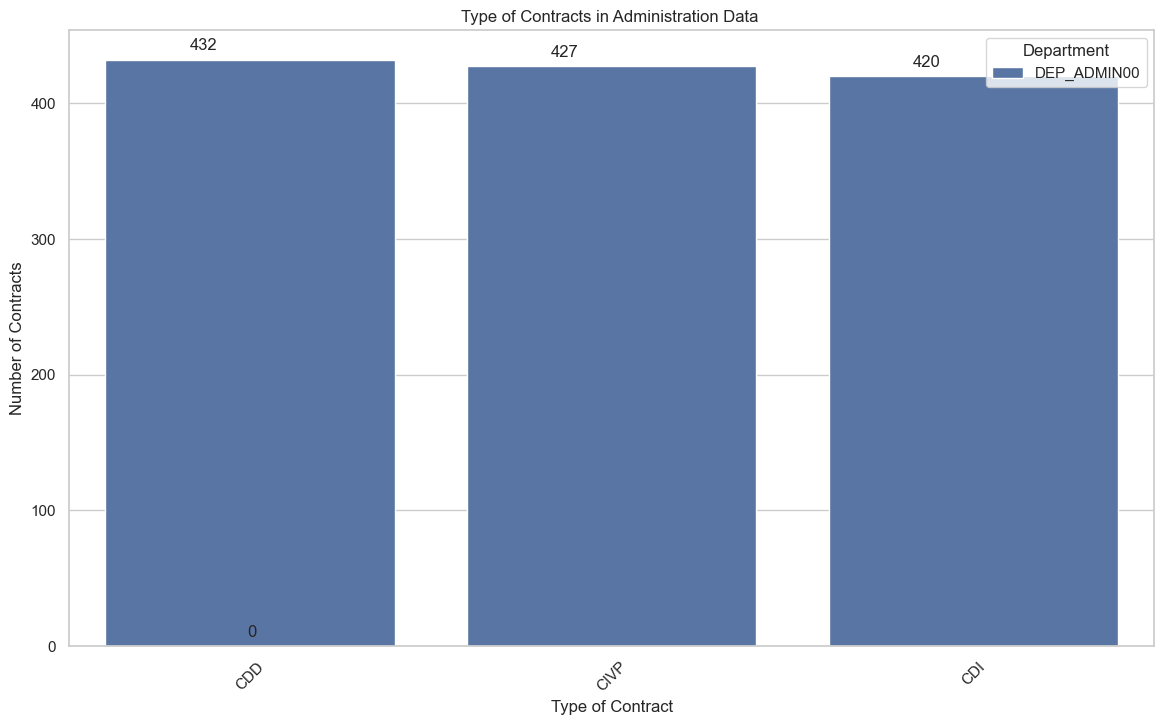

In [62]:
# Plot for administration_data
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='TYPE_CONTRACT', data=df1, hue='DEP_ID')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 3., p.get_height()), ha='center', va='center', xytext=(1, 10), textcoords='offset points')

plt.title('Type of Contracts in Administration Data ')
plt.xlabel('Type of Contract')
plt.ylabel('Number of Contracts')
plt.xticks(rotation=45)
plt.legend(title='Department')
plt.show()

2) other departments:

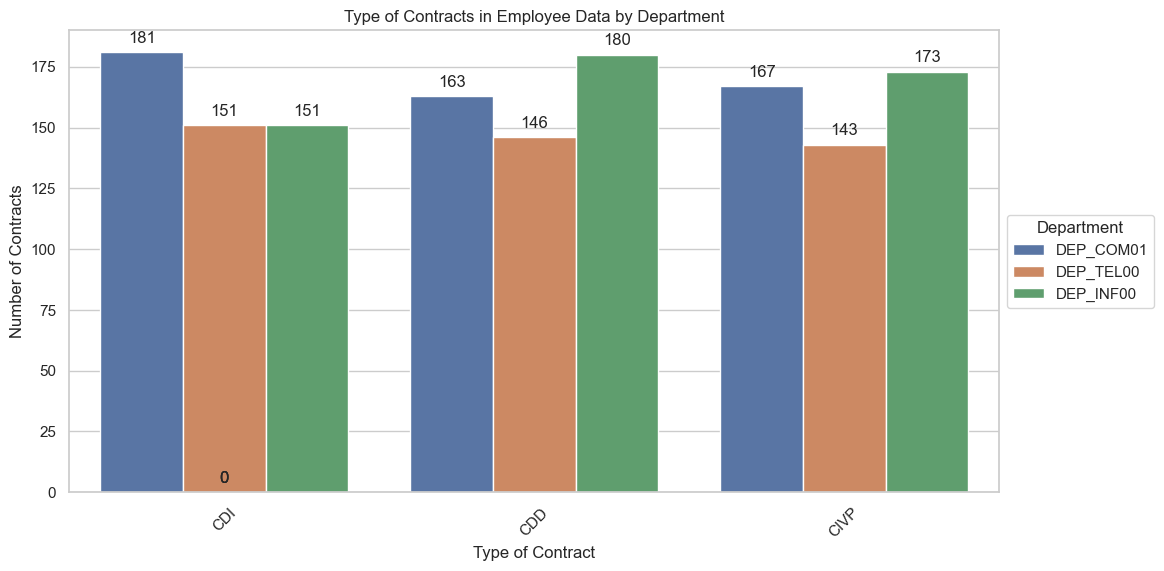

In [45]:
# Plot for emp_data
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='TYPE_CONTRACT', data=df2, hue='DEP_ID')

# Add exact numbers above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Type of Contracts in Employee Data by Department')
plt.xlabel('Type of Contract')
plt.ylabel('Number of Contracts')
plt.xticks(rotation=45)

# Create a separate legend for department names and colors
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Department', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Salaries:

1) Administration department:

C:\Users\lando\AppData\Local\Temp\ipykernel_207668\2881645280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grade', y='SALARY', data=df1, palette='muted')


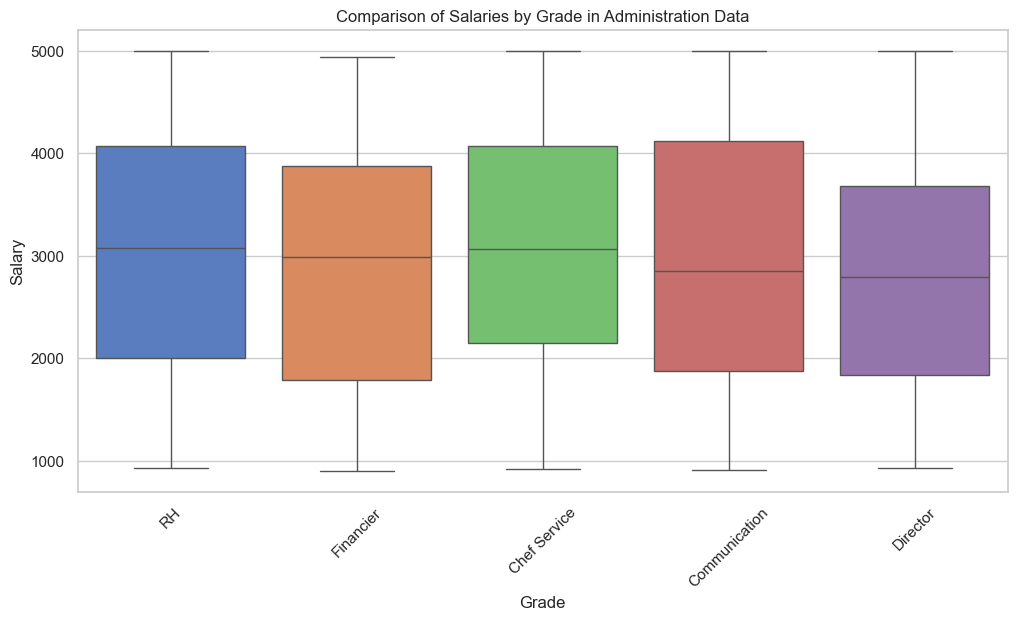

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grade', y='SALARY', data=df1, palette='muted')
plt.title('Comparison of Salaries by Grade in Administration Data')
plt.xlabel('Grade')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

2) Others departments:

C:\Users\lando\AppData\Local\Temp\ipykernel_207668\2559115153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEP_ID', y='SALARY', data=df2, palette='Set1')


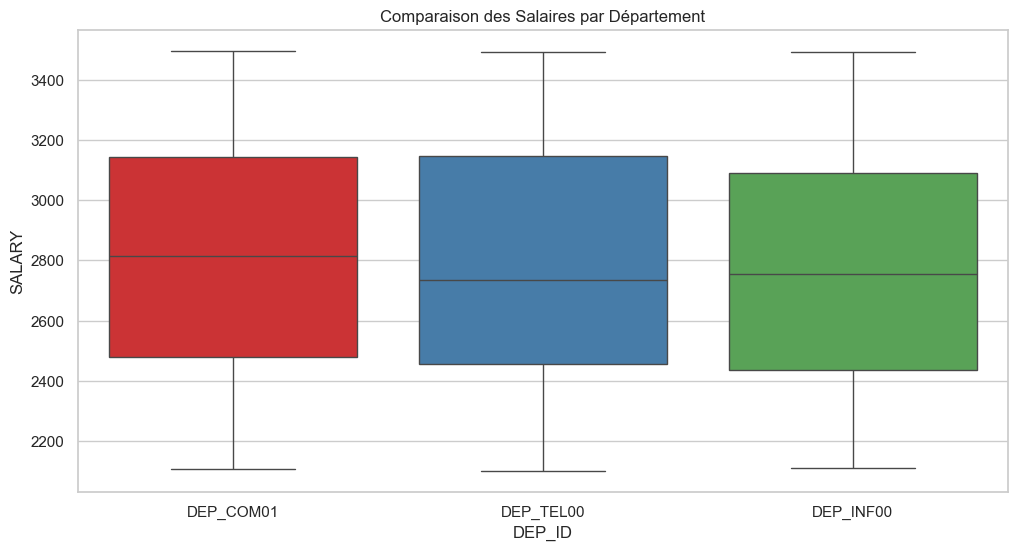

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='DEP_ID', y='SALARY', data=df2, palette='Set1')
plt.title('Comparaison des Salaires par Département')
plt.show()

### Source of recrutments:

1) administration department:

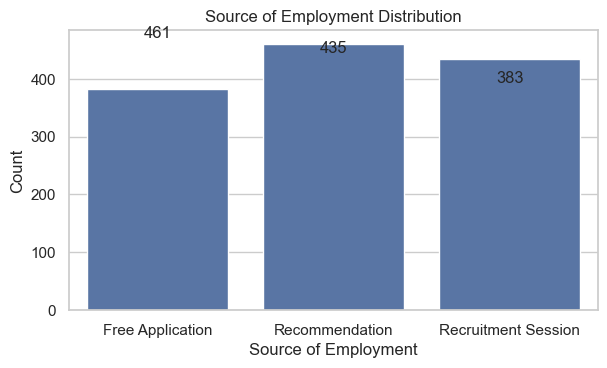

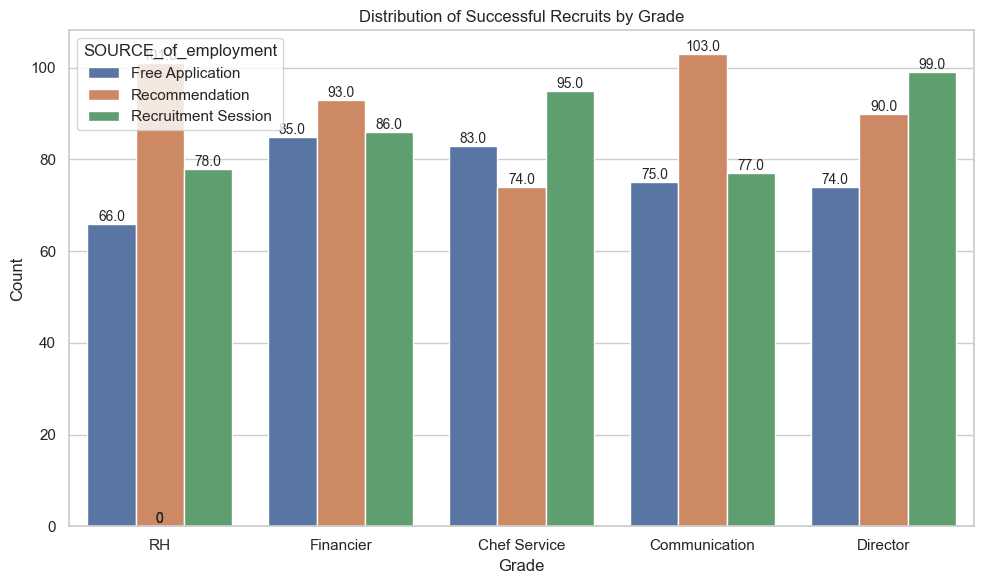

In [48]:
plt.figure(figsize=(15, 8))

# Source of Employment Distribution in administration_data
plt.subplot(2, 2, 1)
source_of_employment_counts = df1['SOURCE_of_employment'].value_counts()
sns.countplot(x='SOURCE_of_employment', data=df1)
plt.title('Source of Employment Distribution')
plt.xlabel('Source of Employment')
plt.ylabel('Count')
for index, value in enumerate(source_of_employment_counts):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

    #by grade
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Grade', hue='SOURCE_of_employment', data=df1)
plt.title('Distribution of Successful Recruits by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)


plt.tight_layout()
plt.show()

* In general the main source of employment is coming from "Recommendation"
* The grade R&H has the highest number of recruits from free applications, which suggests that this grade is either more popular or more accessible for candidates who apply on their own.

* The grades Financier and Communication have the highest number of recruits from recommendations and recruitment sessions, which implies that these grades require more specialized skills or qualifications that are best identified through referrals or interviews.

* The grade Chef Service has a balanced distribution of recruits from all sources except recruitment sessions, which indicates that this grade is not very selective or competitive and can attract candidates from various channels.

* The grade Director has the highest number of recruits from free applications, which could mean that this grade is either very prestigious or very challenging and requires candidates who are confident and motivated to apply on their own.

2) other departments:

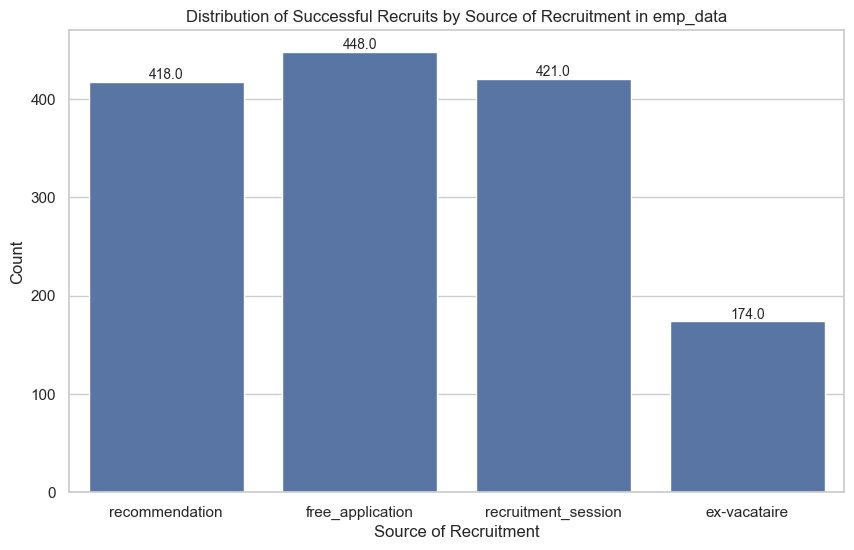

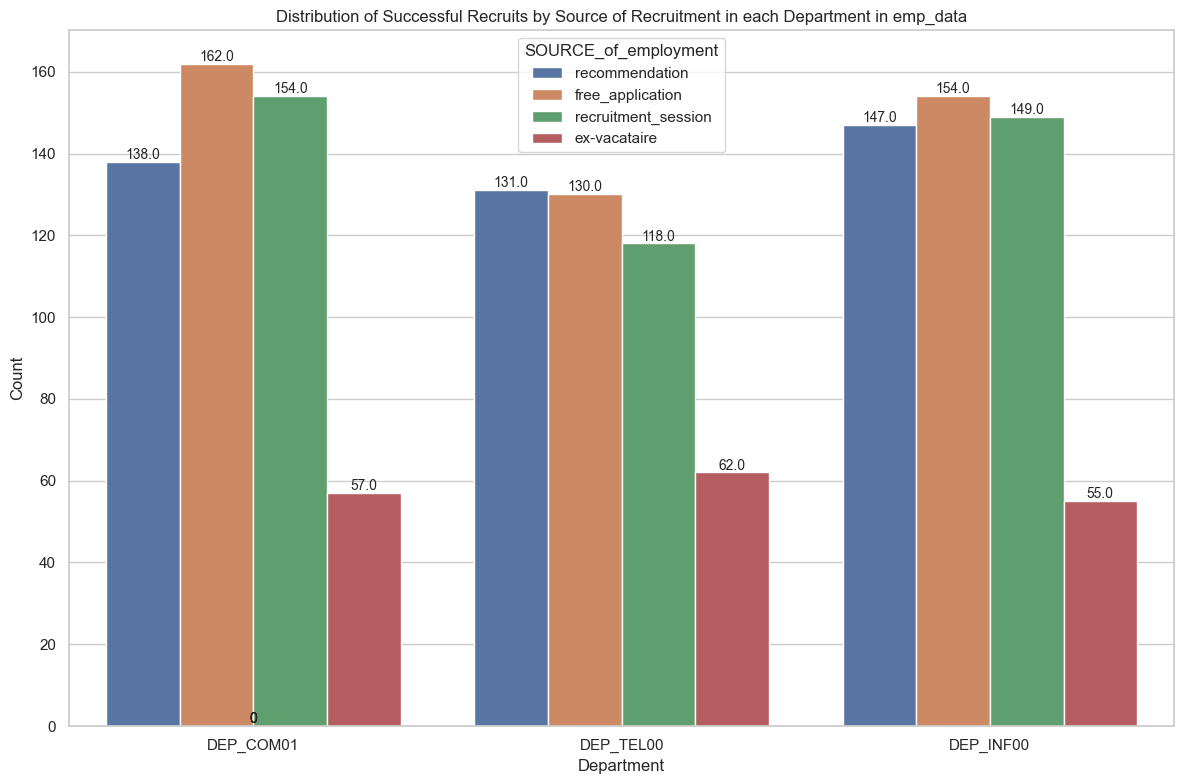

In [49]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SOURCE_of_employment', data=df2)
plt.title('Distribution of Successful Recruits by Source of Recruitment in emp_data')
plt.xlabel('Source of Recruitment')
plt.ylabel('Count')

# Add numbers above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

    # each department:
    
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='DEP_ID', hue='SOURCE_of_employment', data=df2)
plt.title('Distribution of Successful Recruits by Source of Recruitment in each Department in emp_data')
plt.xlabel('Department')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    if not pd.isnull(height): 
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

### Competences visualisation:

#### Count of Type Diploma in Every Department:

Count of Type Diploma in Every Department:
TYPE_DIPLOMA  Doctoral  Ingeneering  Master
DEP                                        
COMMUN             168          174     169
INFORMATIQUE       160          179     166
TELECOM            172          143     126
Count of Type Diploma in Administration Department:
TYPE_DIPLOMA    Engineer  Licence  Master
DEP                                      
ADMINISTRATION       424      421     434


<Figure size 1400x800 with 0 Axes>

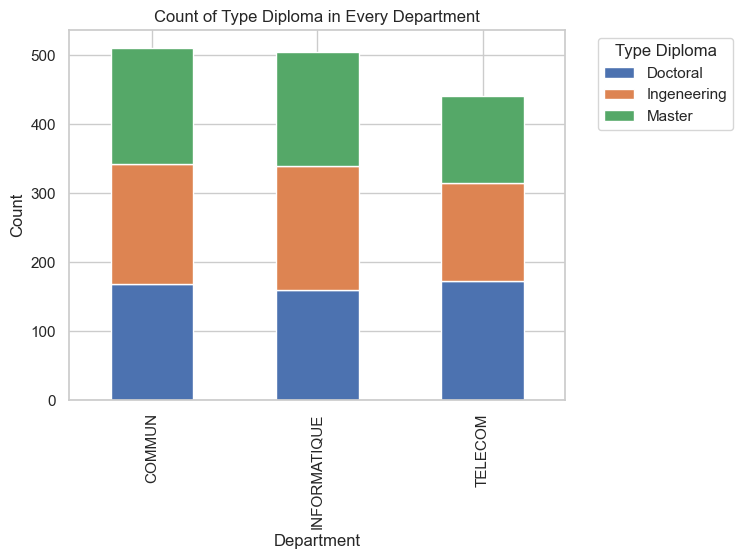

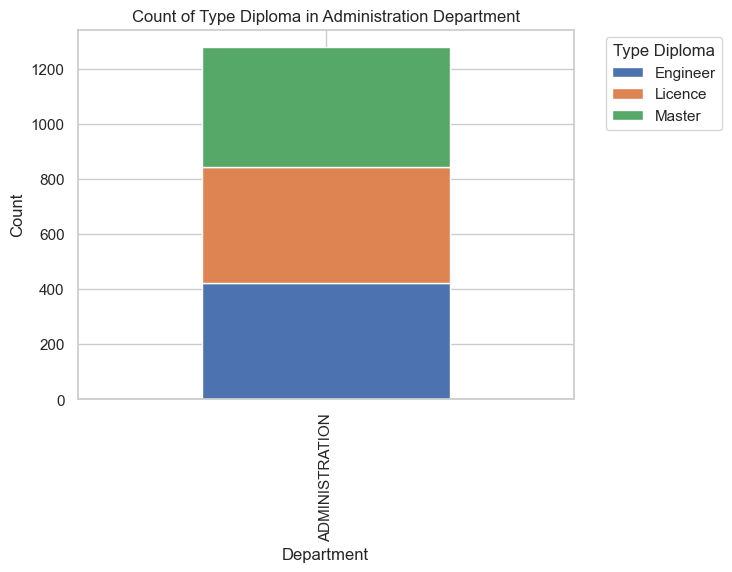

In [50]:
# Merge df1 with df5 to get department names for df2
merged_df2_with_department = pd.merge(df2, df5[['ID_DEP', 'DEP']], left_on='DEP_ID', right_on='ID_DEP', how='left')

# Count the occurrences of each type of diploma in every department
diploma_count_by_department = merged_df2_with_department.groupby(['DEP', 'TYPE_DIPLOMA']).size().unstack(fill_value=0)

# Display the count of each type of diploma in every department
print("Count of Type Diploma in Every Department:")
print(diploma_count_by_department)

# Merge df1 with df5 to get department names for df1
merged_df1_with_department = pd.merge(df1, df5[['ID_DEP', 'DEP']], left_on='DEP_ID', right_on='ID_DEP', how='left')

# Count the occurrences of each type of diploma in every department
diploma_count_by_department1 = merged_df1_with_department.groupby(['DEP', 'TYPE_DIPLOMA']).size().unstack(fill_value=0)

# Display the count of each type of diploma in every department
print("Count of Type Diploma in Administration Department:")
print(diploma_count_by_department1)

#VISUALIZATION

# Use the merged dataframe from the previous code
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Plot a stacked bar chart
diploma_count_by_department.plot(kind='bar', stacked=True)
plt.title('Count of Type Diploma in Every Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Type Diploma', bbox_to_anchor=(1.05, 1), loc='upper left')

diploma_count_by_department1.plot(kind='bar', stacked=True)
plt.title('Count of Type Diploma in Administration Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Type Diploma', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


* The majority of employees in every departtment have a Master degree then an engeneering degree 
* The majority of administration department employees have a Master degree so you don't need high degrees to get recruited in this department

### Top 10 universities

C:\Users\lando\AppData\Local\Temp\ipykernel_207668\49927162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=top_10_diplomas.index, y=top_10_diplomas.values, palette='muted')


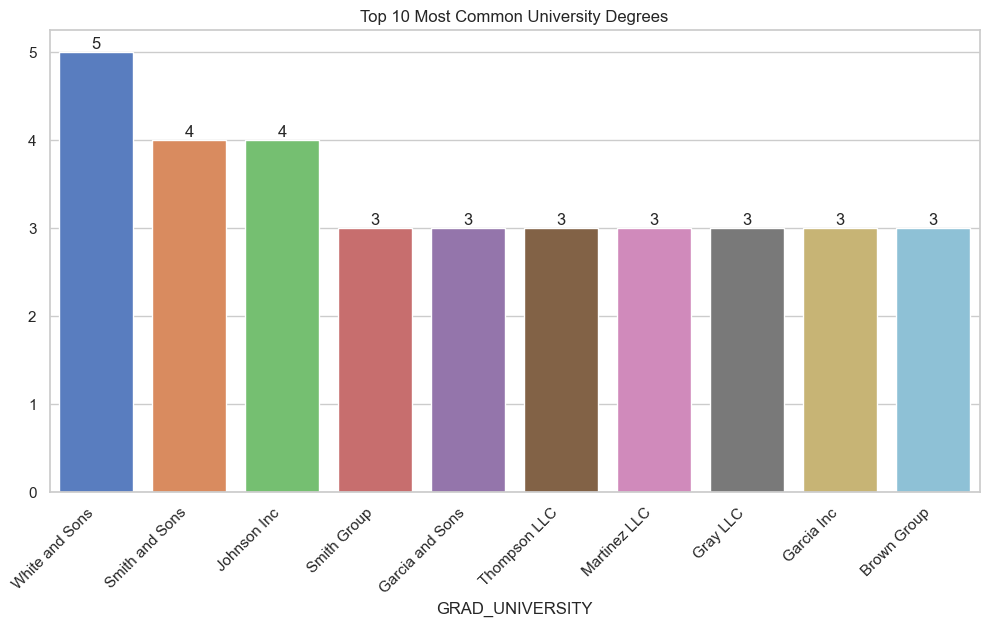

In [63]:
top_10_diplomas = df2['GRAD_UNIVERSITY'].value_counts().nlargest(10)

# Créer un graphique à barres
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_10_diplomas.index, y=top_10_diplomas.values, palette='muted')
plt.title('Top 10 Most Common University Degrees')
plt.xticks(rotation=45, ha='right')

# Ajouter le nombre d'employés au-dessus de chaque barre
for index, value in enumerate(top_10_diplomas.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()

### The distribution of technologies per department:

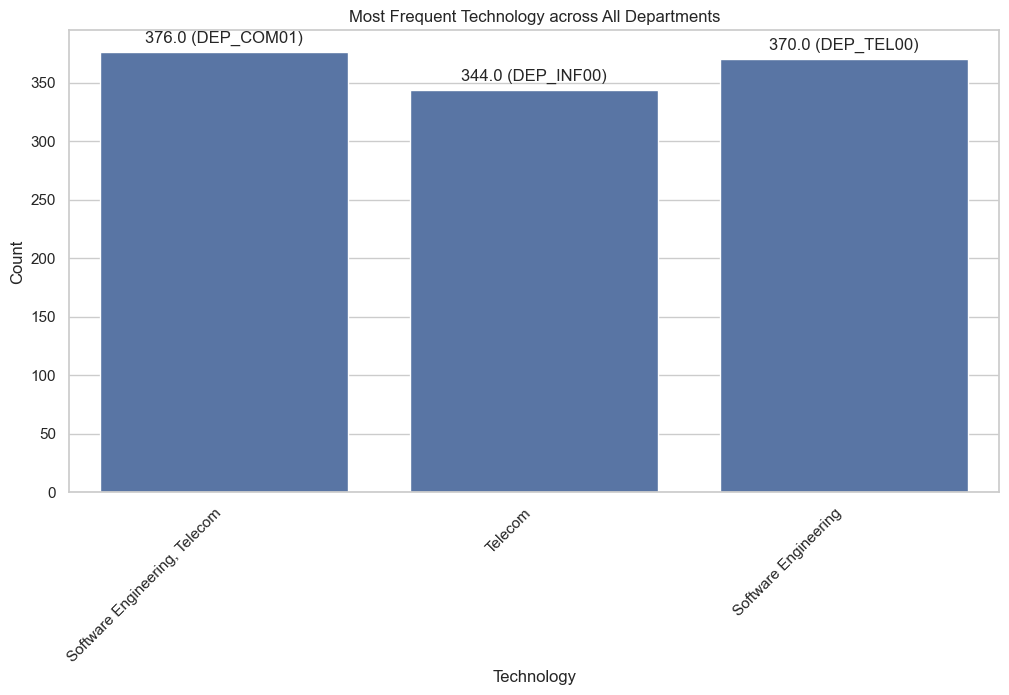

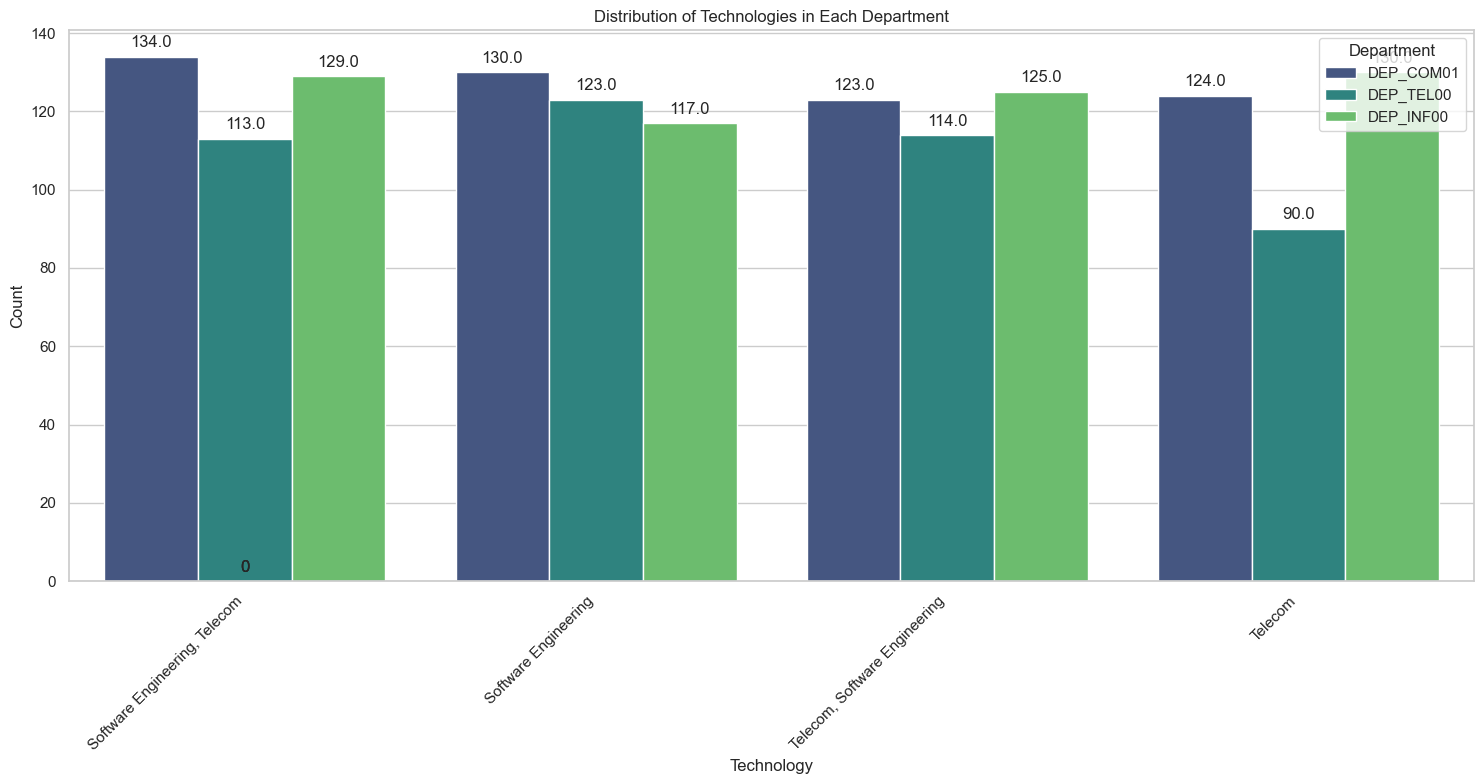

In [52]:
# Grouping by department and finding the most frequent technology
most_frequent_tech = df2.groupby('DEP_ID')['TECHNOLOGIES'].agg(lambda x: x.value_counts().index[0])

# Grouping by department and finding the most frequent technology
most_frequent_tech = df2.groupby('DEP_ID')['TECHNOLOGIES'].agg(lambda x: x.value_counts().index[0])

# Plotting the most frequent technology in all departments
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='TECHNOLOGIES', data=df2[df2['DEP_ID'].isin(most_frequent_tech.index)], order=most_frequent_tech.values)
plt.title('Most Frequent Technology across All Departments')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Technology')
plt.ylabel('Count')

# Adding numbers above each bar and specifying departments
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({most_frequent_tech.index[ax.patches.index(p)]})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Showing the distribution of technologies in each department
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='TECHNOLOGIES', hue='DEP_ID', data=df2, order=df2['TECHNOLOGIES'].value_counts().index, palette='viridis')
plt.title('Distribution of Technologies in Each Department')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Technology')
plt.ylabel('Count')

# Adding numbers above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(title='Department')
plt.tight_layout()
plt.show()

#### Language visualization:

1) Administration department:

C:\Users\lando\AppData\Local\Temp\ipykernel_207668\3276506286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  language_df1['LANGUAGE'] = language_df1['LANGUAGE'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])


Language Counts in Every Department (df1):
LANGUAGE     Anglais  Arabe  Francais  Others
DEP_ID                                       
DEP_ADMIN00      814    808       792     793


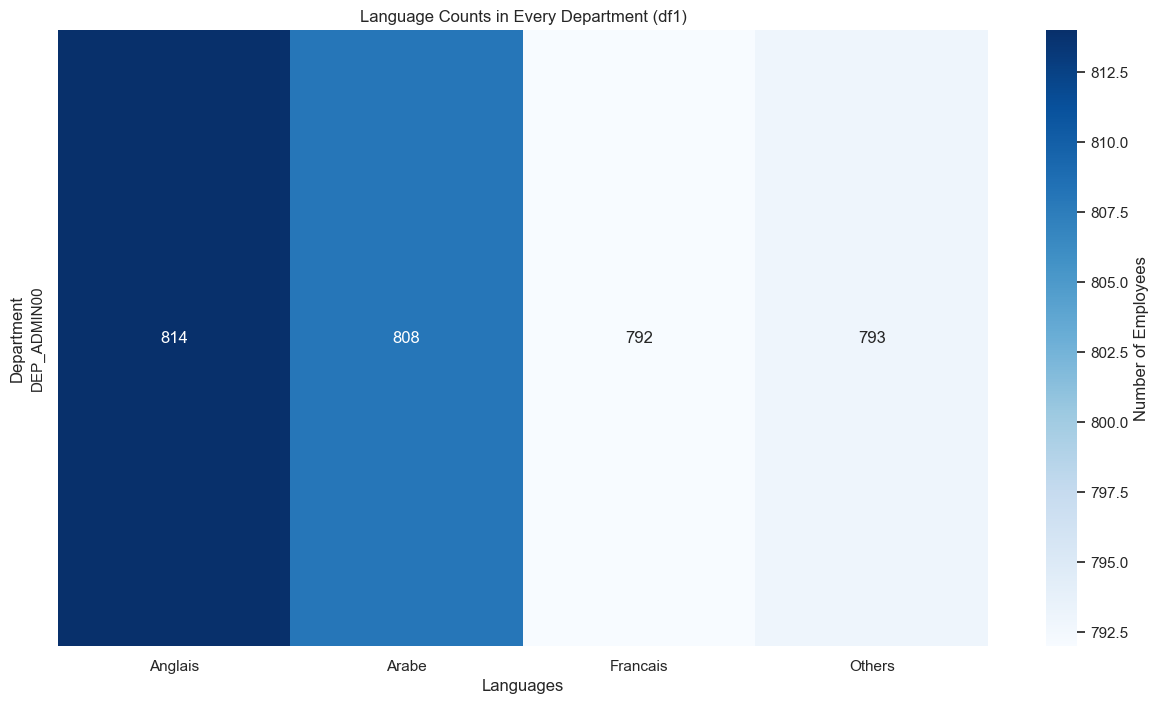

In [53]:
# Select relevant columns from df1
language_df1 = df1[['DEP_ID', 'LANGUAGE']]

# Flatten the list of languages
language_df1['LANGUAGE'] = language_df1['LANGUAGE'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])
language_df1 = language_df1.explode('LANGUAGE')

# Count the occurrences of each language for each department
language_counts = language_df1.groupby(['DEP_ID', 'LANGUAGE']).size().unstack().fillna(0)

# Print the language counts for each department
print("Language Counts in Every Department (df1):")
print(language_counts)

# Plot the language counts for each department
plt.figure(figsize=(15, 8))
sns.heatmap(language_counts, cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Number of Employees'})
plt.title('Language Counts in Every Department (df1)')
plt.xlabel('Languages')
plt.ylabel('Department')
plt.show()

2) Other departments:

C:\Users\lando\AppData\Local\Temp\ipykernel_207668\378299128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  language_df2['LANGUAGE'] = language_df2['LANGUAGE'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])


Language Counts in Every Department (df2):
LANGUAGE   anglais  arabe  francais  others
DEP_ID                                     
DEP_COM01      311    335       335     323
DEP_INF00      329    299       303     329
DEP_TEL00      263    276       279     295


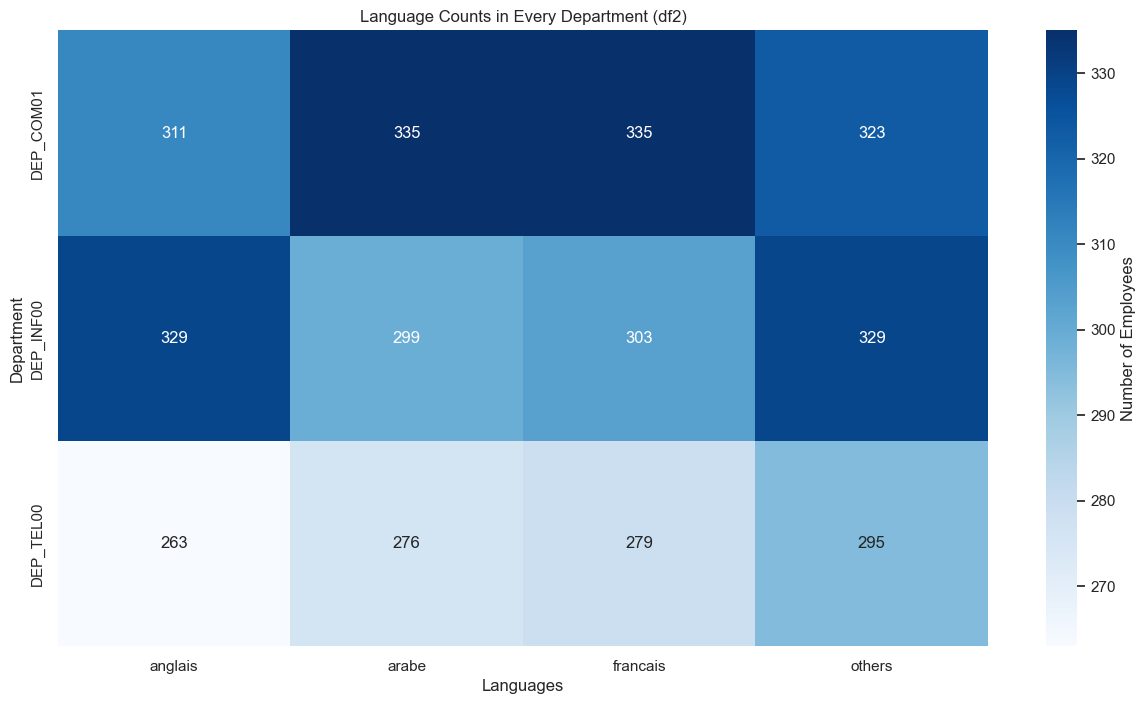

In [54]:
# Select relevant columns from df2
language_df2 = df2[['DEP_ID', 'LANGUAGE']]

# Flatten the list of languages
language_df2['LANGUAGE'] = language_df2['LANGUAGE'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])
language_df2 = language_df2.explode('LANGUAGE')

# Count the occurrences of each language for each department
language_counts = language_df2.groupby(['DEP_ID', 'LANGUAGE']).size().unstack().fillna(0)

# Print the language counts for each department
print("Language Counts in Every Department (df2):")
print(language_counts)

# Plot the language counts for each department
plt.figure(figsize=(15, 8))
sns.heatmap(language_counts, cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Number of Employees'})
plt.title('Language Counts in Every Department (df2)')
plt.xlabel('Languages')
plt.ylabel('Department')
plt.show()

### Trends of Employee Hiring by Month  :

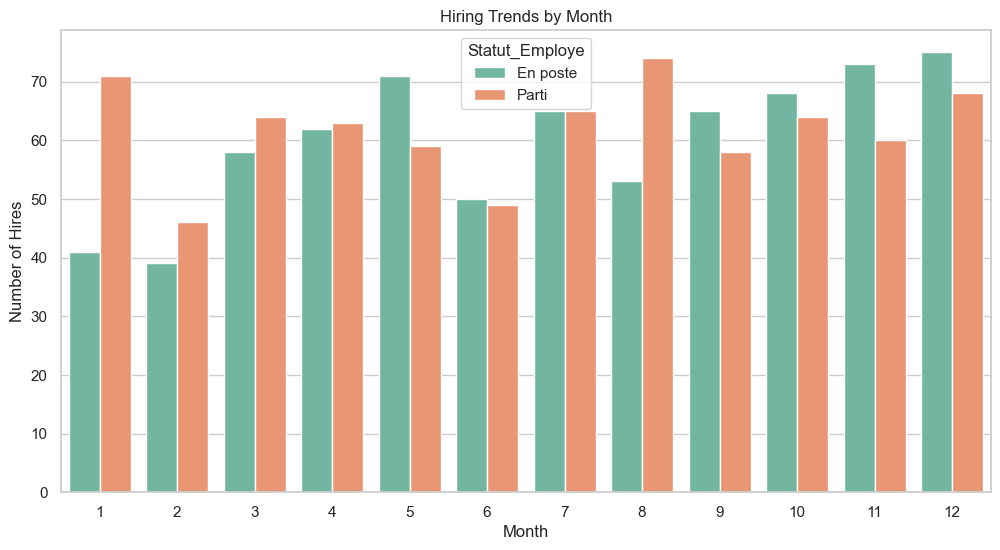

In [55]:
df2['CONTRACT_START'] = pd.to_datetime(df2['CONTRACT_START'])
df2['CONTRACT_END'] = pd.to_datetime(df2['CONTRACT_END'])

# Créer une nouvelle colonne 'Statut_Employe' en utilisant numpy.where
df2['Statut_Employe'] = np.where(df2['CONTRACT_END'].isnull(), 'En poste', 'Parti')


df2['CONTRACT_START_MONTH'] = df2['CONTRACT_START'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(x='CONTRACT_START_MONTH', data=df2, hue='Statut_Employe', palette='Set2')
plt.title('Hiring Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Hires')
plt.show()

## Relationship between Years of Experience and Salary with Trend Line:

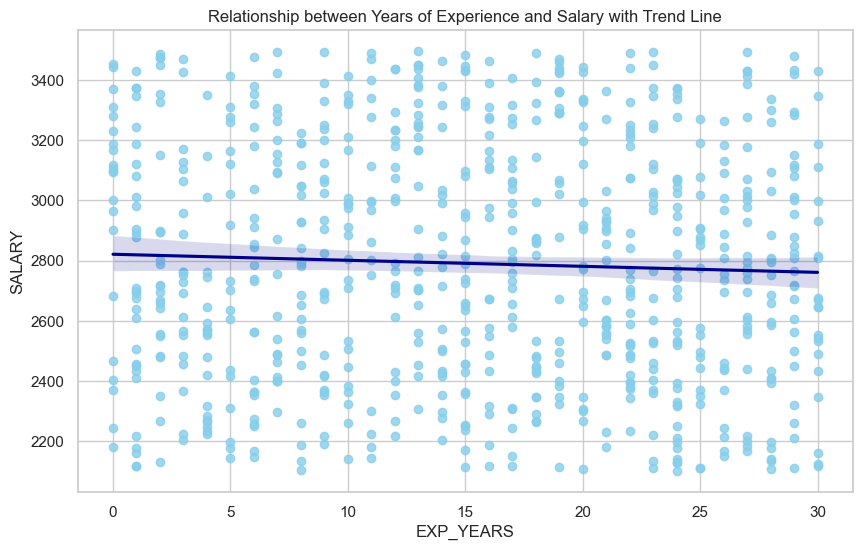

In [56]:
plt.figure(figsize=(10, 6))
sns.regplot(x='EXP_YEARS', y='SALARY', data=df2, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'darkblue'})
plt.title('Relationship between Years of Experience and Salary with Trend Line')
plt.show()


### Pairplot of Numerical Variables: 

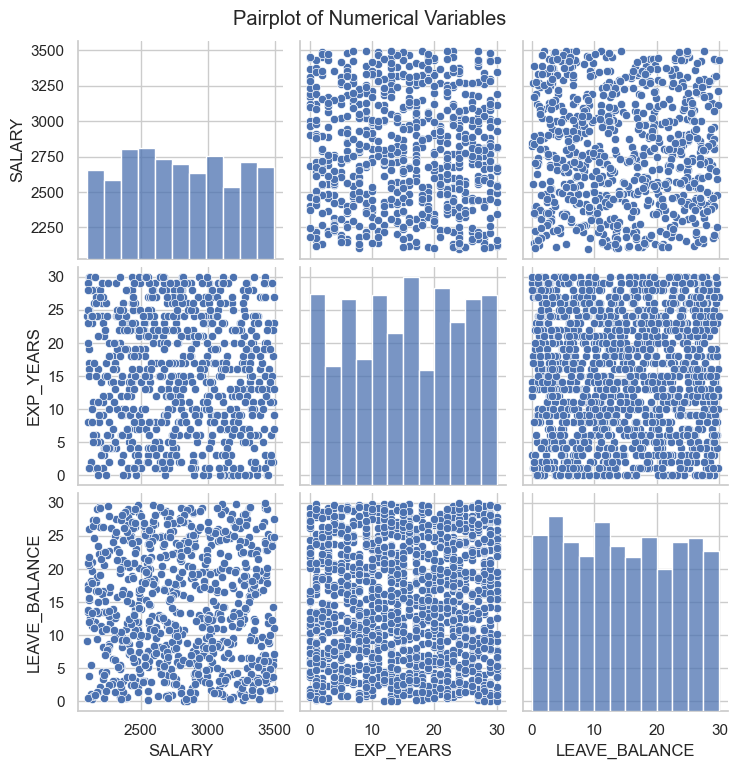

In [57]:
# Pairplot pour visualiser les relations entre variables numériques
sns.pairplot(df2[['SALARY', 'EXP_YEARS', 'LEAVE_BALANCE']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


### activity per Departement:

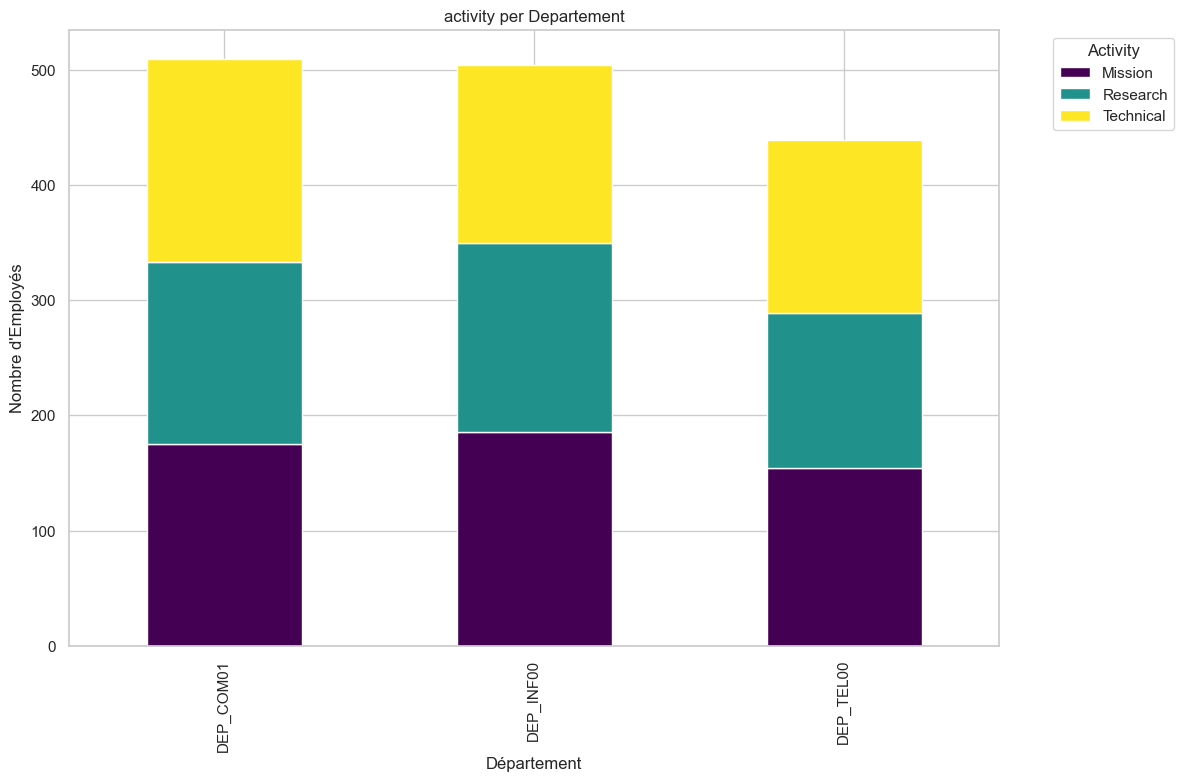

In [58]:
missions_by_department = df2.pivot_table(index='DEP_ID', columns='ACTIVITY', values='NAME_EMP', aggfunc='count')

# Tracer le diagramme à barres empilées
missions_by_department.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('activity per Departement')
plt.xlabel('Département')
plt.ylabel('Nombre d\'Employés')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Top 10 Training Courses per Department Visualization :

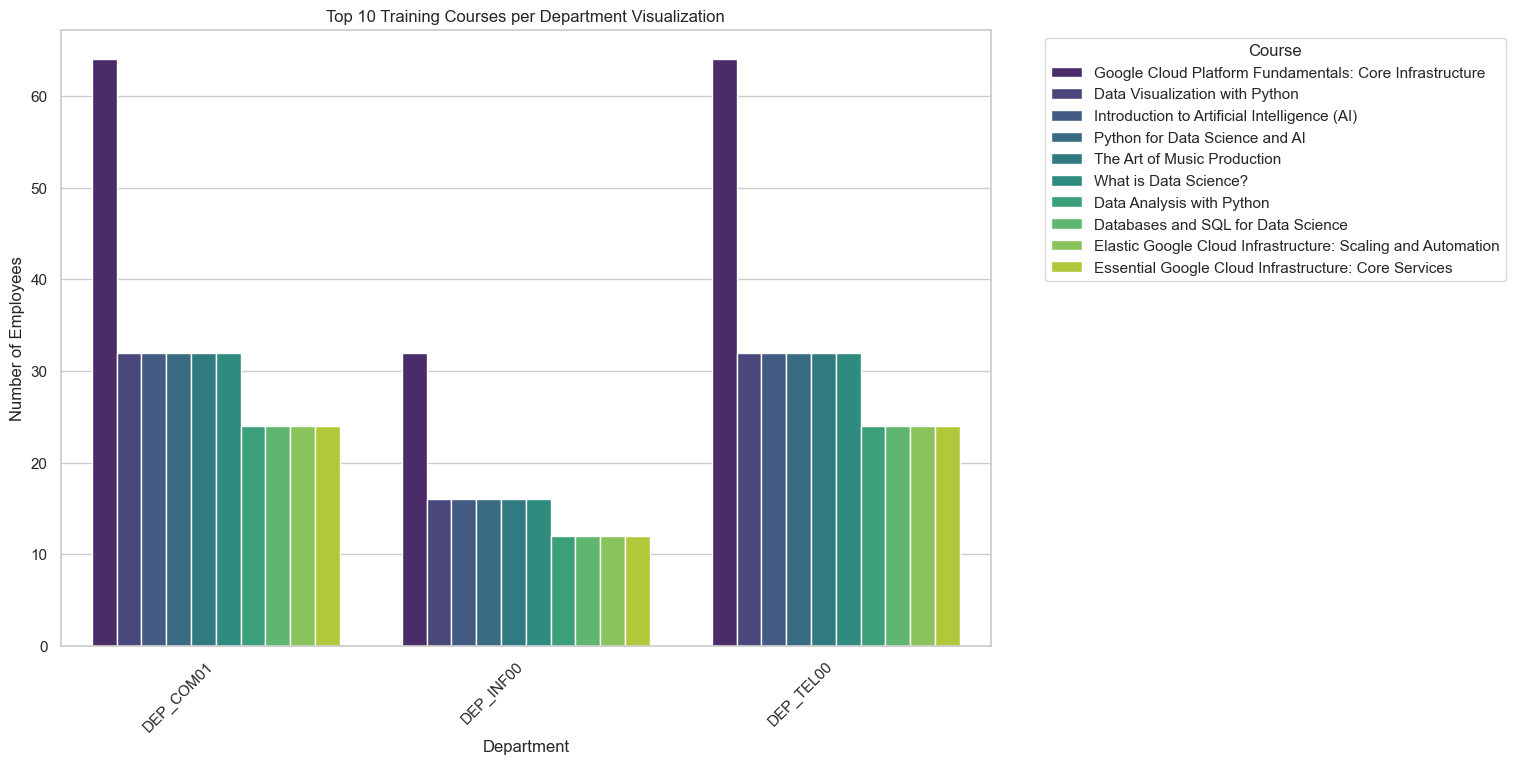

In [59]:
df2['ID_TRAINING'] = df2['ID_TRAINING'].astype(str)
df3['id_course'] = df3['id_course'].astype(str)  # Convert 'id_course' to string type

# Merge the DataFrames on the 'ID_TRAINING' and 'id_course' columns
merged_data = pd.merge(df2, df3, left_on='ID_TRAINING', right_on='id_course', how='left')

# Obtain the list of the top 10 most frequent courses per department
top_10_trainings_by_department = merged_data.groupby(['DEP_ID', 'Course Name']).size().groupby('DEP_ID', group_keys=False).nlargest(10).reset_index(name='Count')

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='DEP_ID', y='Count', hue='Course Name', data=top_10_trainings_by_department, palette='viridis', dodge=True)
plt.title('Top 10 Training Courses per Department Visualization')
plt.xlabel('Department')
plt.ylabel("Number of Employees")
plt.legend(title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()


### Correlation Matrix between Numerical Variables

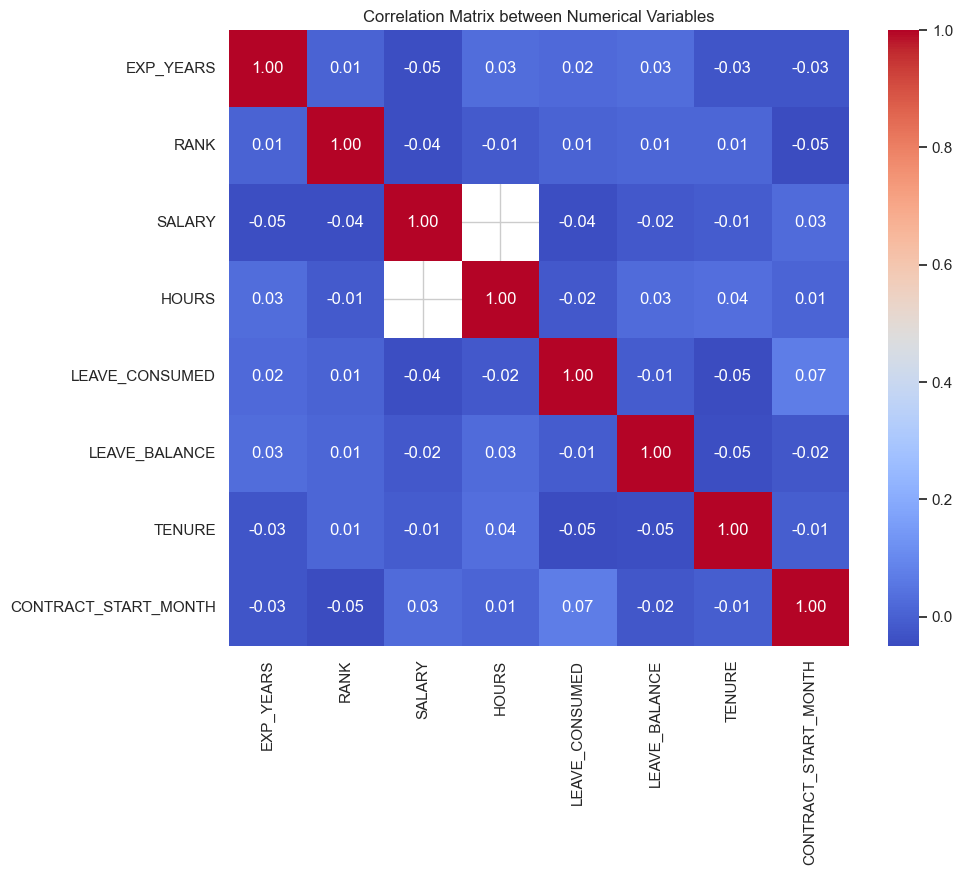

In [60]:
numeric_cols = df2.select_dtypes(include='number')

# Calculer la corrélation
correlation_matrix = numeric_cols.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Numerical Variables')
plt.show()

Based on the data visualizations , here is a general interpretation:

Workforce Distribution by Department: The visualization provides insights into the distribution of employees across different departments. This helps in understanding the composition of the workforce within the organization and identifying any departmental imbalances.

Leave Usage Trends: By analyzing leave usage trends over time, we can identify patterns and peak periods of absenteeism. This information is valuable for better resource planning and ensuring adequate coverage during high-demand periods.

Top 10 Training Programs by Department: This visualization highlights the most popular training programs within each department. It helps in understanding the skills development needs of different teams and tailoring training initiatives accordingly.

Salary Distribution Analysis: The analysis of salary distribution by department, position, and experience level provides insights into the organization's compensation structure. It helps in ensuring fairness and competitiveness in salary offerings and identifying areas for improvement.

Contract and Assignment Tracking: Monitoring active contract types and tracking assignments helps in ensuring compliance with contractual obligations and timely renewals. It also provides insights into mission profitability based on associated costs.

Key Performance Indicators (KPIs) for HR: Developing KPIs to evaluate HR process effectiveness, productivity, employee satisfaction, and retention is crucial for measuring the overall performance of HR initiatives and aligning them with organizational goals.

Professional Experience Analysis: Studying the impact of professional experience on performance helps in identifying trends and patterns that can inform recruitment, training, and career development strategies.

These data visualizations provide valuable insights for HR decision-making, resource planning, and strategic initiatives aimed at optimizing workforce management and enhancing organizational performance.